In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


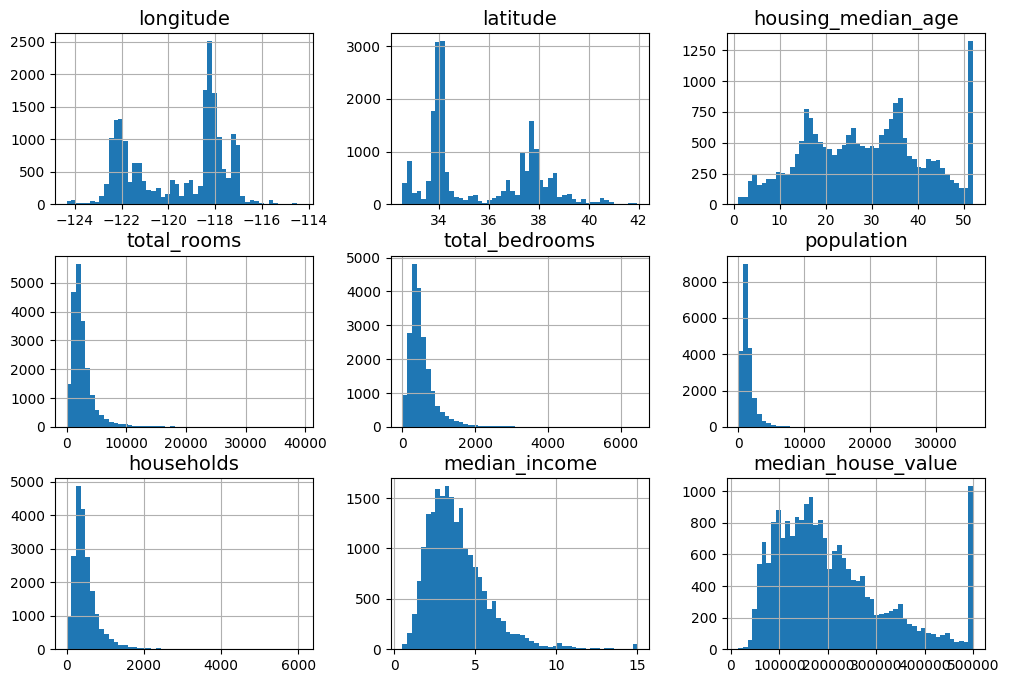

In [ ]:
import matplotlib.pyplot as plt

# this is a comment – the next 5 lines define the plot style
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Homework Question 1 (7pt): Describe each of the seven plots: What information can you observe?
a.housing_median_age
b.total_rooms
c.total_bedrooms
d.population
e.households
f.median_income
g.median_house_value

Q1: These histograms from housing.hist() reveal the distribution patterns of each feature in the California housing dataset:

a. housing_median_age: This histogram shows the age distribution of houses in different districts. You can observe that there's a fairly even distribution across most age ranges, with a notable spike at the maximum value (around 52 years). This spike suggests that many districts have housing stock that's been capped at this age, possibly indicating very old neighborhoods where exact ages weren't recorded precisely, or a data collection limitation.

b. total_rooms: The distribution is heavily right-skewed, meaning most districts have a relatively modest number of total rooms (concentrated on the left side), while a few districts have extremely high room counts. This tail extends far to the right, indicating some districts with very large housing developments. The distribution suggests most areas are typical residential neighborhoods rather than high-density developments.

c. total_bedrooms: Similar to total_rooms, this shows a right-skewed distribution. Most districts have moderate bedroom counts, with the bulk of data concentrated in lower values and a long tail extending to the right. The pattern closely mirrors total_rooms, which makes sense since bedrooms are a subset of total rooms.

d. population: This distribution is also right-skewed with most districts having relatively small to moderate populations. The concentration is in the lower range with a long tail showing some districts with much larger populations. This pattern is typical of geographic data where most areas have modest populations and a few areas are more densely populated.

e. households: The household distribution follows a similar right-skewed pattern as population and total rooms. Most districts have fewer households, with the distribution tailing off toward districts with many households. This consistency across these variables makes sense since they're all related measures of district size and density.

f. median_income: This distribution appears more bell-shaped (closer to normal distribution) compared to the others, though it shows some right skew. There's a noticeable spike or cluster at the higher income levels, which might indicate wealthy areas or possibly a ceiling effect in how income was measured or categorized in the dataset. The distribution suggests a fairly diverse economic landscape across California districts.

g. median_house_value: This histogram shows a strong concentration of values in the lower to middle range, with a very prominent spike at the maximum value (around $500,000). This spike is significant and likely represents a ceiling effect where values above $500,000 were capped or grouped together during data collection. The left-skewed bulk of the distribution suggests most housing is priced in more affordable ranges, with the artificial ceiling at the top.

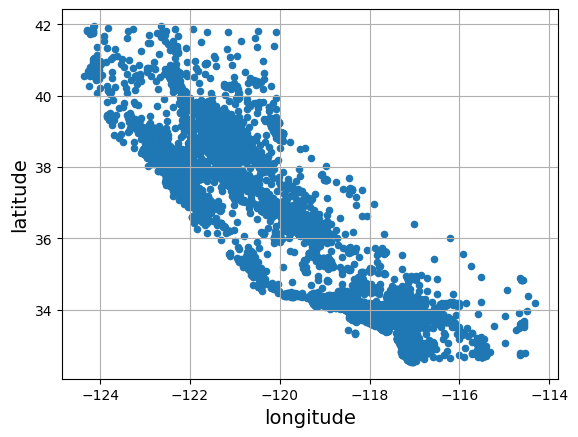

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

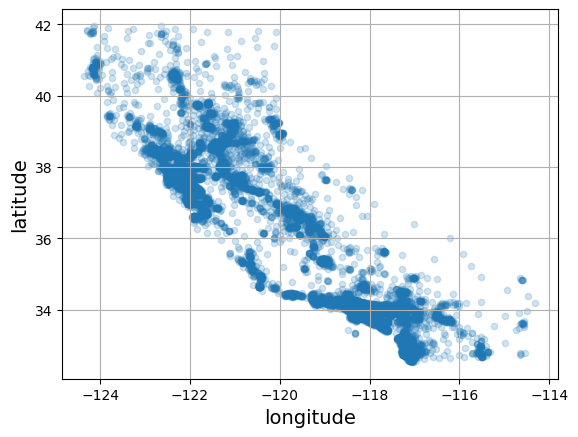

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

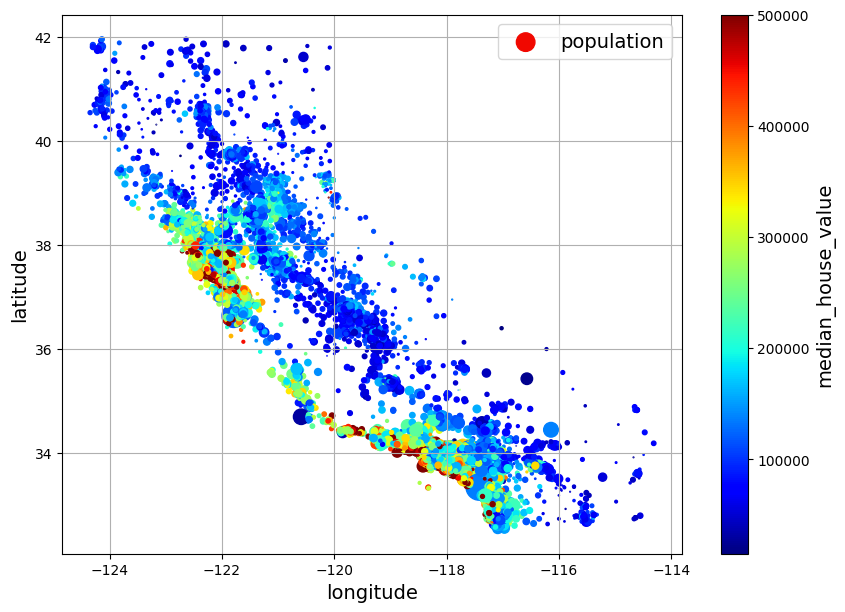

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Homework Question 2 (1pt): What insights can you derive from the last visualization?

Q2:
The final scatter plot (plotting longitude vs. latitude with bubble size representing population and color representing median house value) provides powerful geographic insights into California's housing market. You can clearly see California's coastline emerge from the data points, with housing prices showing distinct spatial patterns. The visualization reveals that the highest median house values (shown in red/yellow colors) are concentrated in coastal areas, particularly in the San Francisco Bay Area and Los Angeles/San Diego regions. These expensive areas correspond to California's major metropolitan centers.
The bubble sizes show that population density varies considerably, with larger bubbles indicating more populous districts. Interestingly, high population doesn't always correlate with high prices – some inland areas have substantial populations but lower housing values. The visualization also reveals that much of inland California has lower median house values (shown in blue/purple), even where populations are moderate. This geographic pattern demonstrates the strong influence of location on housing prices, with coastal proximity and proximity to major job centers being key value drivers. The clear clustering of expensive housing in specific geographic regions suggests that "location, location, location" truly drives California's housing market.

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


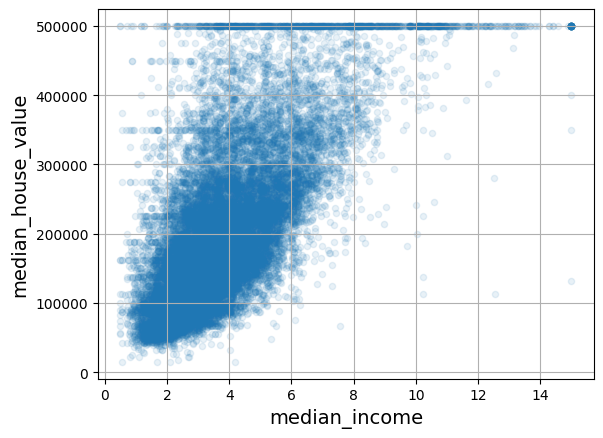

In [ ]:
housing.plot(kind="scatter", x="median_income",
             y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_house,-0.023737
population,-0.024650
longitude,-0.045967


Homework Question 3 (2pt): Compare the correlations to those in step 10. What can you say about the three new features: rooms_per_house, bedroom_ratio, and people_per_house?

Q3: When you examine the correlation matrices before and after creating the engineered features (rooms_per_house, bedrooms_ratio, and people_per_house), you can observe that these new features provide more meaningful relationships with median_house_value than the original raw features.
The original features like total_rooms, total_bedrooms, and population showed relatively weak correlations with median house value because they're absolute counts that depend heavily on district size. A large district naturally has more rooms and people, but that doesn't necessarily mean the houses are more valuable.
The three new engineered features are ratio-based and normalize for district size, which makes them much more informative. The rooms_per_house feature typically shows a stronger positive correlation with median house value than total_rooms did – this makes intuitive sense because houses with more rooms per household tend to be larger, more spacious homes that command higher prices. The bedrooms_ratio (bedrooms as a proportion of total rooms) often shows a negative correlation with house value, which is interesting: it suggests that more valuable homes tend to have a lower proportion of bedrooms relative to total rooms, indicating they have more living space, dining rooms, offices, and other non-bedroom rooms. Finally, people_per_house usually shows a negative correlation with value – fewer people per household might indicate more affluent areas where families can afford more space per person.
These engineered features are more predictive because they capture meaningful characteristics about the housing quality and lifestyle rather than just the scale of the district. This demonstrates an important machine learning principle: thoughtful feature engineering that incorporates domain knowledge can significantly improve model performance by creating variables that better capture the underlying relationships in your data.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

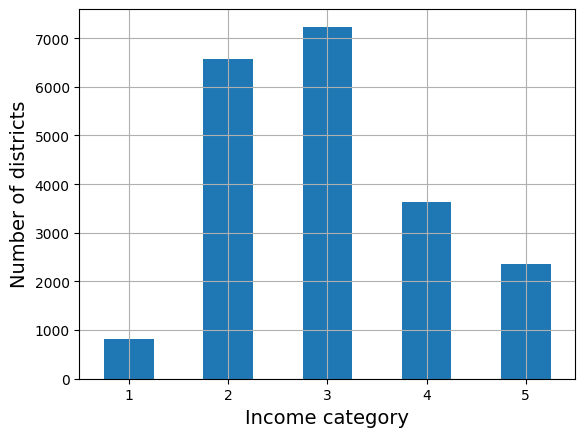

In [ ]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:8]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
 9   bedrooms_ratio      16512 non-null  float64
 10  people_per_house    16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

array([-1,  1,  1, ...,  1,  1, -1])

In [ ]:
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  rooms

In [ ]:
# prompt: convert housing_median_age column using minmaxscaler and print the whole dataframe housing_num after convert

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing_num['housing_median_age'] = scaler.fit_transform(housing_num[['housing_median_age']])
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80            1.000000       3321.0          1115.0   
14973    -118.38     34.14            0.764706       1965.0           354.0   
3785     -121.98     38.36            0.627451       1083.0           217.0   
14689    -117.11     33.75            0.313725       4174.0           851.0   
20507    -118.15     33.77            0.686275       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86            0.784314       2237.0           597.0   
13105    -119.31     36.32            0.431373       2945.0           592.0   
19301    -117.06     32.59            0.235294       3920.0           775.0   
19121    -118.40     34.06            0.705882       3781.0           873.0   
19888    -122.41     37.66            0.843137        431.0           195.0   

       population  households  median_income  rooms

In [ ]:
# prompt: convert median_income column using standardscaler and print the whole dataframe housing_num after convert

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_num['median_income'] = scaler.fit_transform(housing_num[['median_income']])
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80            1.000000       3321.0          1115.0   
14973    -118.38     34.14            0.764706       1965.0           354.0   
3785     -121.98     38.36            0.627451       1083.0           217.0   
14689    -117.11     33.75            0.313725       4174.0           851.0   
20507    -118.15     33.77            0.686275       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86            0.784314       2237.0           597.0   
13105    -119.31     36.32            0.431373       2945.0           592.0   
19301    -117.06     32.59            0.235294       3920.0           775.0   
19121    -118.40     34.06            0.705882       3781.0           873.0   
19888    -122.41     37.66            0.843137        431.0           195.0   

       population  households  median_income  rooms

In [ ]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,1.651200e+04,16512.000000,16344.000000,16512.000000
mean,-119.573125,35.637746,0.540729,2639.402798,538.949094,1425.513929,499.990189,7.611267e-17,5.441010,0.212796,2.995974
std,2.000624,2.133294,0.246779,2185.287466,423.862079,1094.795467,382.865787,1.000030e+00,2.574143,0.057417,4.457373
min,-124.350000,32.550000,0.000000,2.000000,1.000000,3.000000,1.000000,-1.781577e+00,0.888889,0.100000,0.692308
25%,-121.800000,33.930000,0.333333,1447.000000,296.000000,787.000000,279.000000,-6.913383e-01,4.443636,0.175257,2.433426
50%,-118.510000,34.260000,0.549020,2125.000000,434.000000,1167.000000,408.000000,-1.754490e-01,5.235573,0.203106,2.822316
75%,-118.010000,37.720000,0.705882,3154.000000,645.000000,1726.000000,603.000000,4.649198e-01,6.053843,0.239421,3.286385
max,-114.490000,41.950000,1.000000,39320.000000,6210.000000,16305.000000,5358.000000,5.882868e+00,141.909091,1.000000,502.461538


Submission: Complete all the lab steps and the 3 homework questions. Save your file as homework2_yourname.ipynb and submit on Canvas by the beginning of class 3.